<a href="https://colab.research.google.com/github/JuanRenza/Imagenes/blob/master/Clase7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACCESO AL DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**LIBRERIAS Y METODOS**

In [2]:
#Importo las librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

%matplotlib inline
%cd /content/drive/My Drive/colab/Imagenes


/content/drive/My Drive/colab/Imagenes


**TRASLACIÓN**

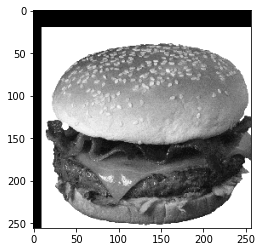

In [4]:
img = cv2.imread('ht.jpg',0)
rows, cols = img.shape

M = np.float32([[1,0,10],[0,1,20]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst, cmap='gray')

**ESCALADO**

Antes de escalado:  256 256
Antes de escalado:  1024 1024


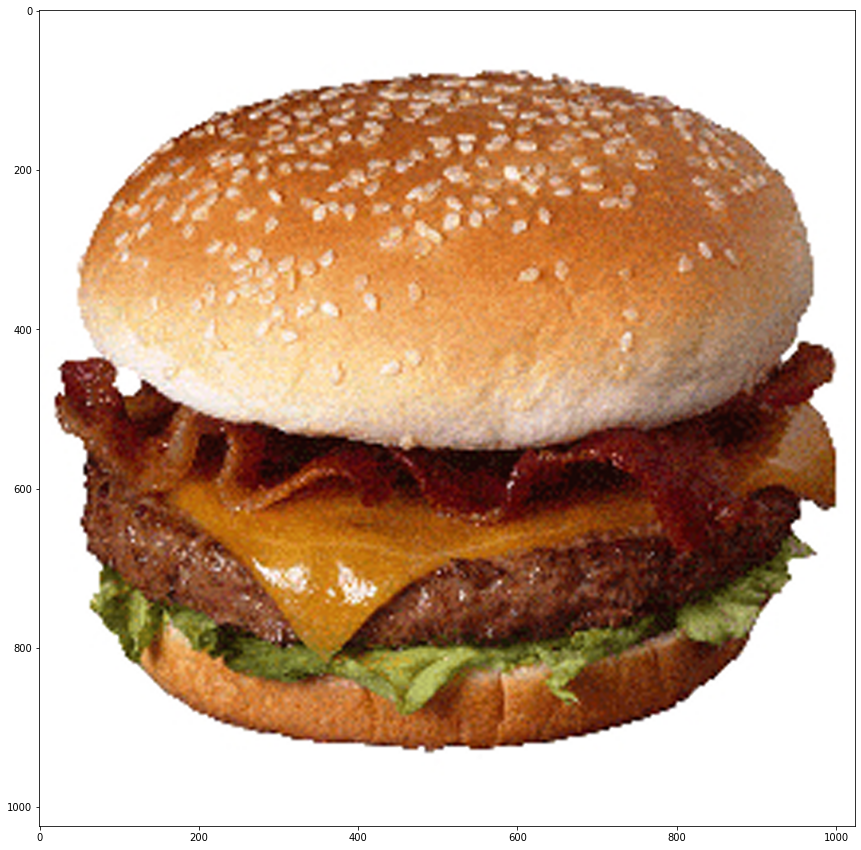

In [5]:
img = cv2.imread('ht.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

res = cv2.resize(img,None,fx=2,fy=2,interpolation = cv2.INTER_CUBIC)

height, width = img.shape[:2]
print("Antes de escalado: ",height,width)
res = cv2.resize(img, (4*width, 4*height), interpolation = cv2.INTER_CUBIC)
height, width = res.shape[:2]
print("Antes de escalado: ",height,width)
fig1=plt.figure(figsize=(15,15))
plt.imshow(res)
plt.show()

**ROTACIÓN**

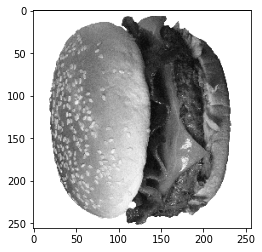

In [6]:
img = cv2.imread('ht.jpg',0)
rows, cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst, cmap='gray')

**ROTACIÓN Y TRASLACIÓN**

256 256


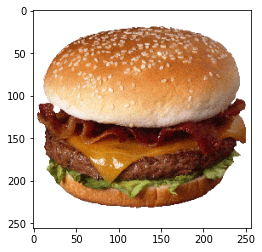

In [43]:
#@title Cambio de parametros {run:"auto"}
img = cv2.imread('ht.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grados = 0 #@param {type:"slider" , min:0, max:360, step:10}
cambio_x = 0 #@param {type:"slider" , min:-250, max:250, step:10}
cambio_y = 0 #@param {type:"slider" , min:-250, max:250, step:10}

rows, cols, _ = img.shape
print(rows, cols)
radianes = grados * np.pi / 100;

M = [
     [np.cos(radianes), -np.sin(radianes), cambio_x],
     [np.sin(radianes), np.cos(radianes), cambio_y]
    ]
M = np.array(M)

rows += int(cambio_x)
cols += int(cambio_y)

res = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(res)
plt.show()



**REFLEJO**

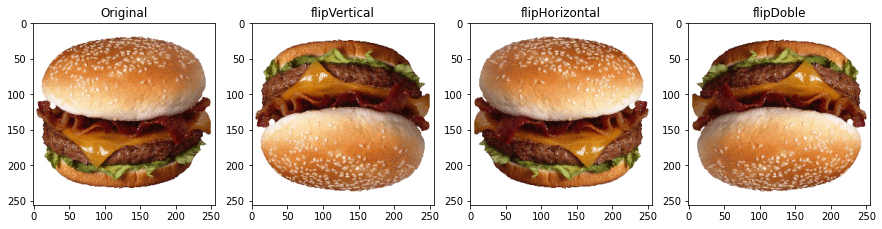

In [7]:
img = cv2.imread('ht.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

flipVertical = cv2.flip(img, 0)
flipHorizontal = cv2.flip(img, 1)
flipDoble = cv2.flip(img, -1)

plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.subplot(142),plt.imshow(flipVertical),plt.title('flipVertical')
plt.subplot(143),plt.imshow(flipHorizontal),plt.title('flipHorizontal')
plt.subplot(144),plt.imshow(flipDoble),plt.title('flipDoble')
plt.show()

**PERSPECTIVA**

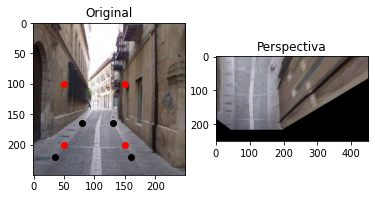

In [21]:
img = cv2.imread('calle.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, ch = img.shape

pts1 = np.float32([[80,165],[130,165],[35,220],[160,220]]) #Puntos negros
pts2 = np.float32([[50,100],[150,100],[50,200],[150,200]])

xE=[80,130,35,160]
yE=[165,165,220,220]

xS=[50,150,50,150]
yS=[100,100,200,200]

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(rows+200, cols))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.scatter(xE,yE,color='k')
plt.scatter(xS,yS,color='r')
plt.subplot(122),plt.imshow(dst),plt.title('Perspectiva')
plt.show()